In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install catboost --quiet
!pip install category_encoders --quiet
!pip install japanize_matplotlib --quiet
!pip install matplotlib --quiet
!pip install matplotlib_venn --quiet
!pip install numpy --quiet
!pip install packaging --quiet
!pip install pandas --quiet
!pip install scikit_learn --quiet
!pip install seaborn --quiet
!pip install tqdm --quiet
!pip install xgboost --quiet
!pip install ipywidgets --quiet
!pip install lightgbm --quiet



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [ ]:
# !pip install setuptools
# !pip install numpy
!pip install seaborn --quiet

#importing necessary libraries

In [ ]:
import sys, os

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
#reading data
data = pd.read_csv("NBA_Dataset_csv.csv")
df = data.copy()
# shape of the data
print("Dimension of the dataset is= ",df.shape)

Dimension of the dataset is=  (159, 7)


In [ ]:
df.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [ ]:
cols = list(df.columns)
df.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [ ]:
# cols
# ['Team',
#  'Points_Scored',
#  'Weightlifting_Sessions_Average',
#  'Yoga_Sessions_Average',
#  'Laps_Run_Per_Practice_Average',
#  'Water_Intake',
#  'Players_Absent_For_Sessions']

# renaming required columns
df=df.rename(columns={'Points_Scored':'Points',
                      'Weightlifting_Sessions_Average':'WL',
                      'Yoga_Sessions_Average':'Yoga',
                      'Laps_Run_Per_Practice_Average':'Laps',
                      'Water_Intake':'WI',
                      'Players_Absent_For_Sessions':'PAFS'
                      }
             )

In [ ]:
df.head()

,Team,Points,WL,Yoga,Laps,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


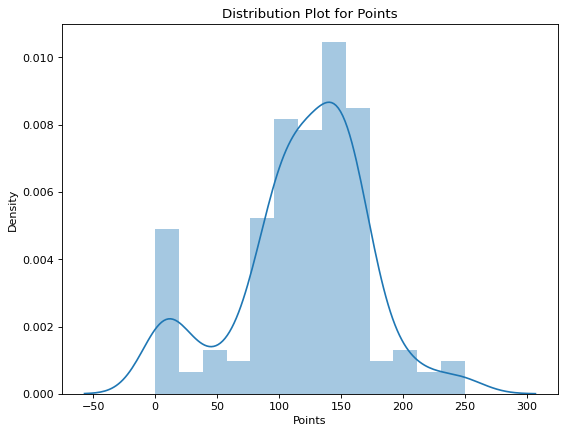

In [ ]:
#DistPlot
figure(figsize=(8, 6), dpi=80)
ax = sns.distplot(df.Points)
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Points")
plt.show()

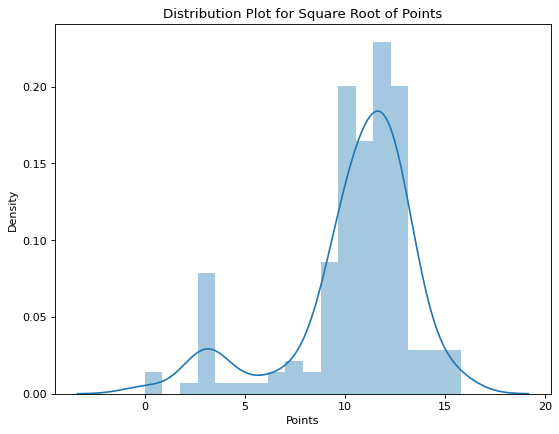

In [ ]:
#distplot can be replaced with displot
points = np.sqrt(df.Points)

figure(figsize=(8, 6), dpi=80)
ax = sns.distplot(points)
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Square Root of Points")
plt.show()

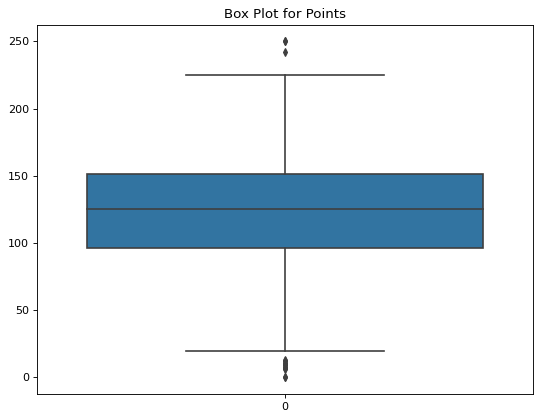

In [ ]:
#boxplot visualization
figure(figsize=(8, 6), dpi=80)
sns.boxplot(df.Points)
plt.title("Box Plot for Points")
plt.show()

In [ ]:
#function for plotting violin plots
def plotting_box_violin_plots(df,x,y):
  fig,axes = plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and box plots for variable : {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable : {}".format(y))
  axes[1].set_title("Box plot for variable : {}".format(y))

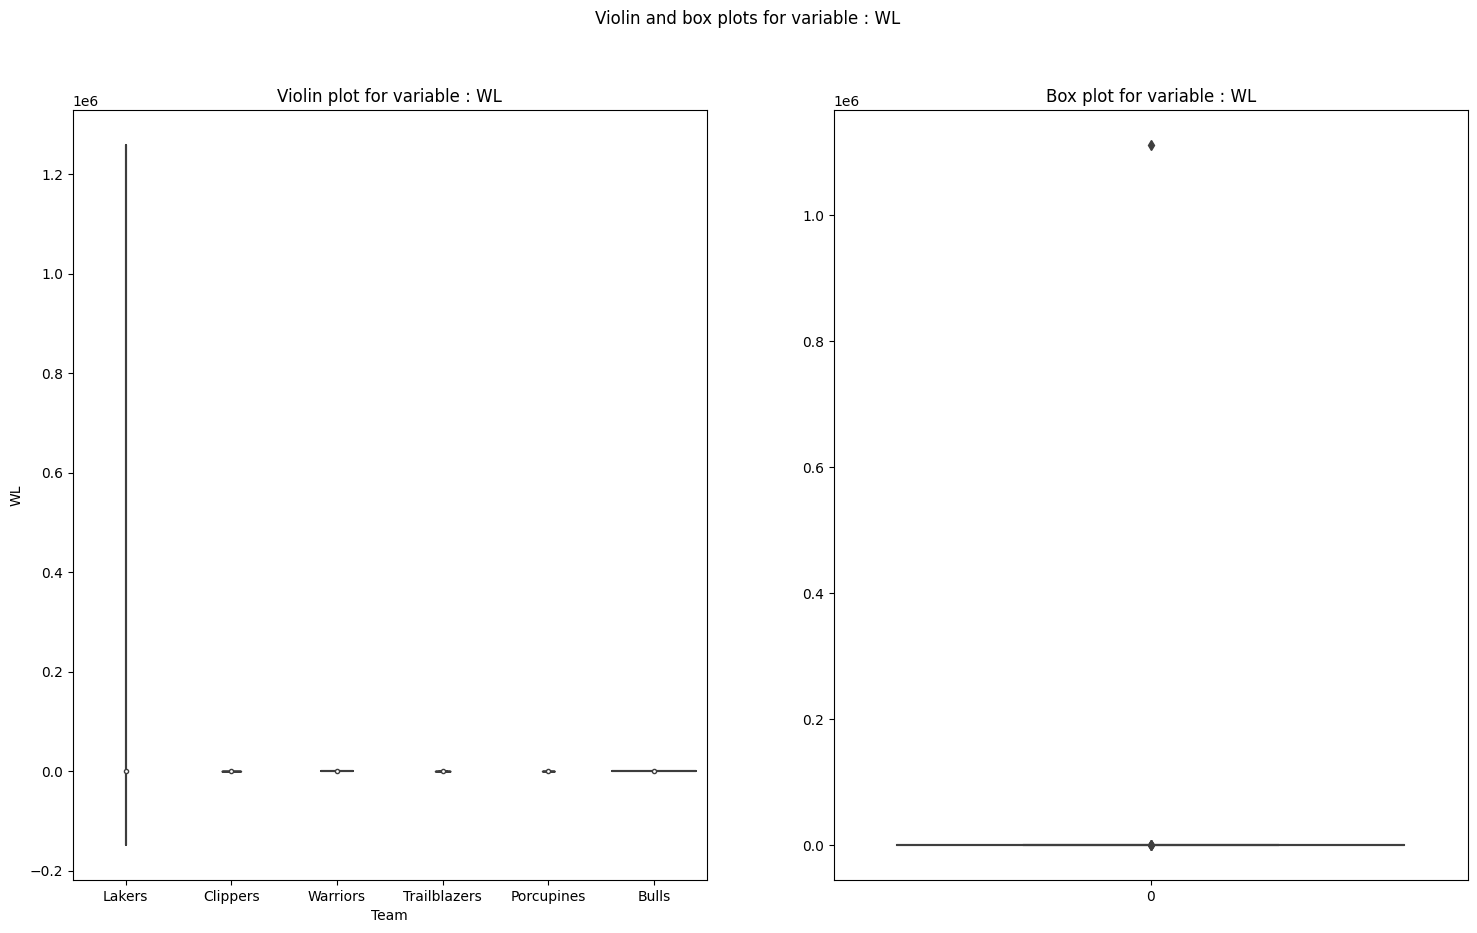

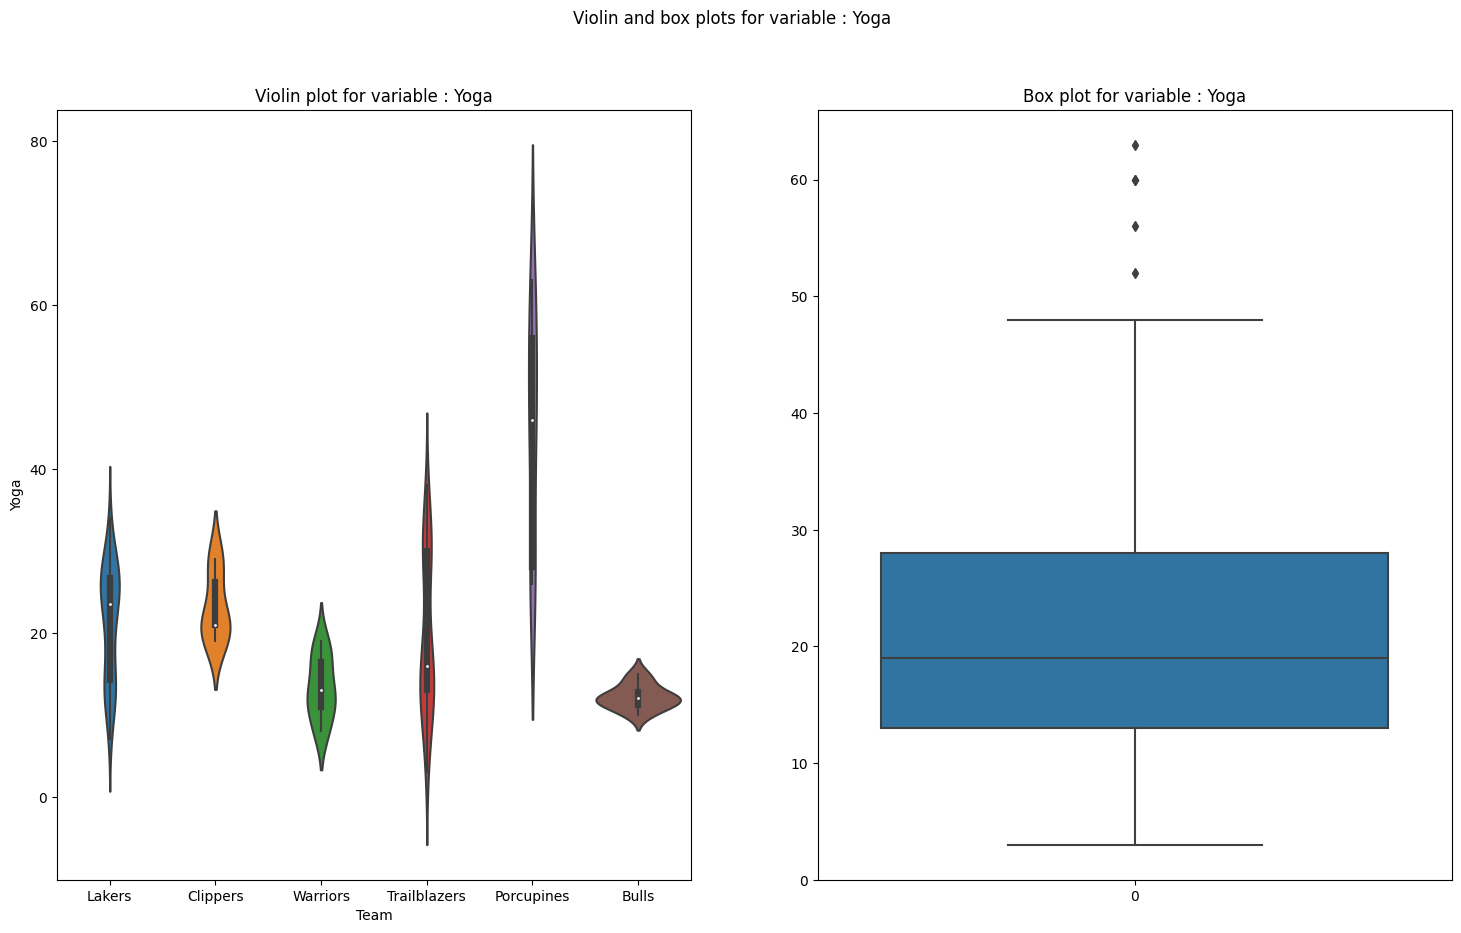

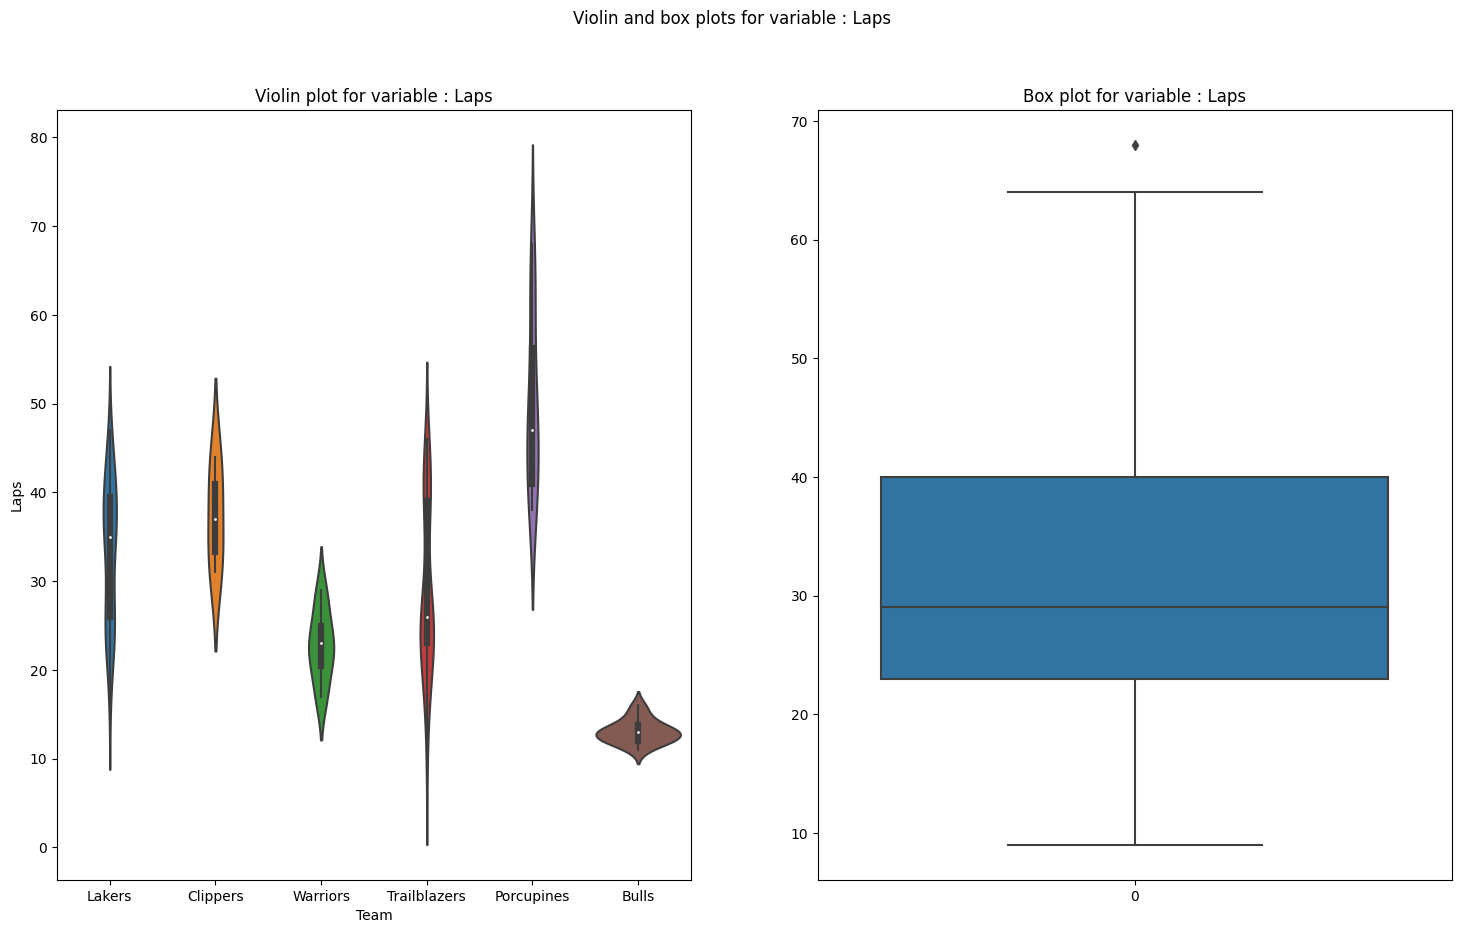

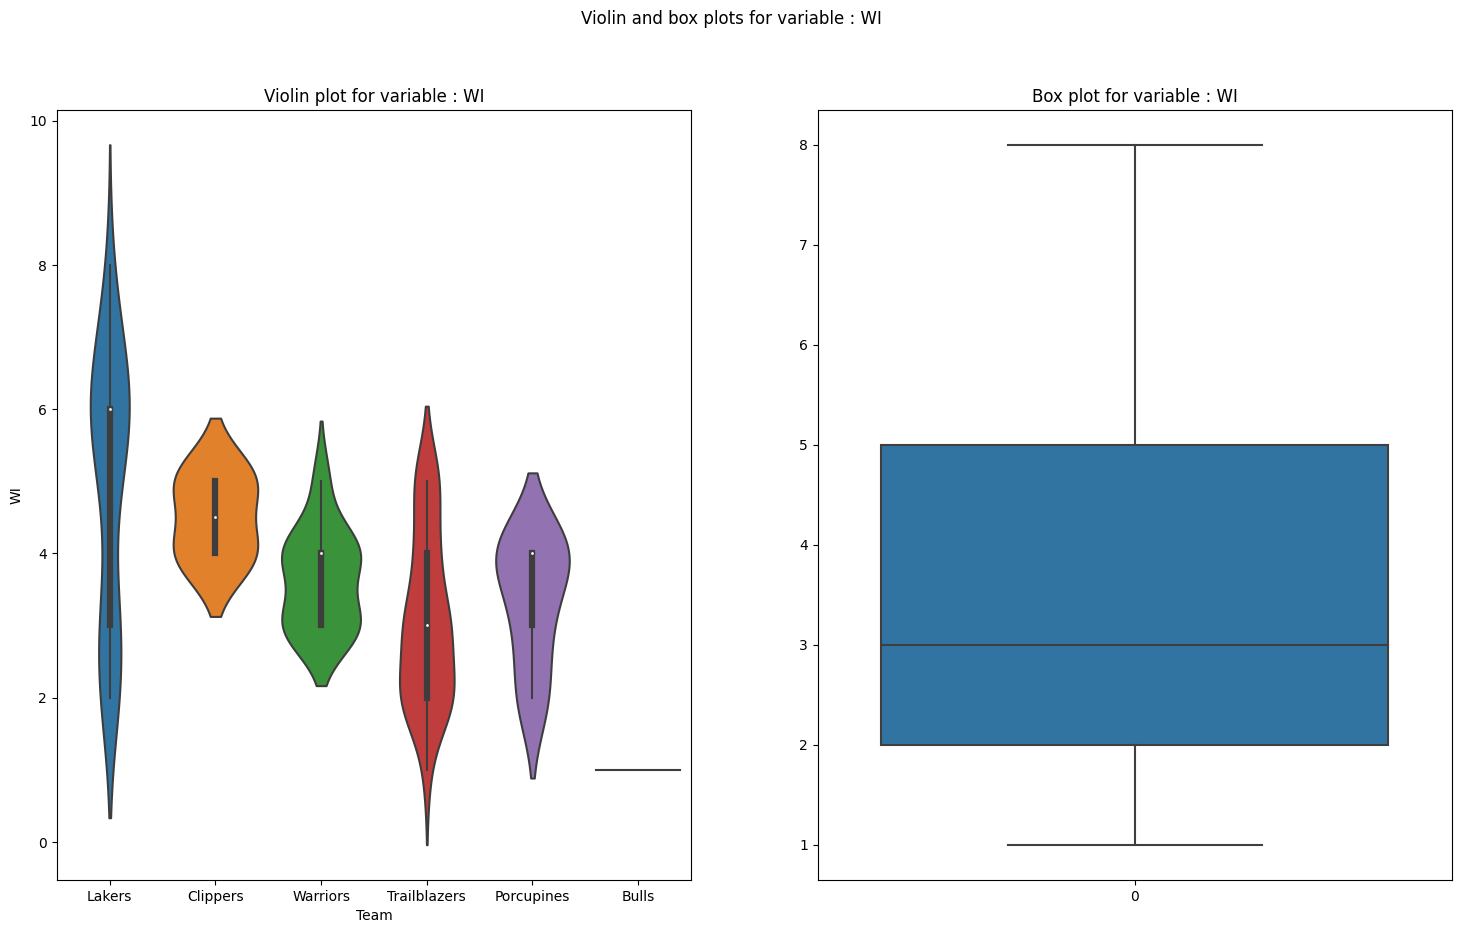

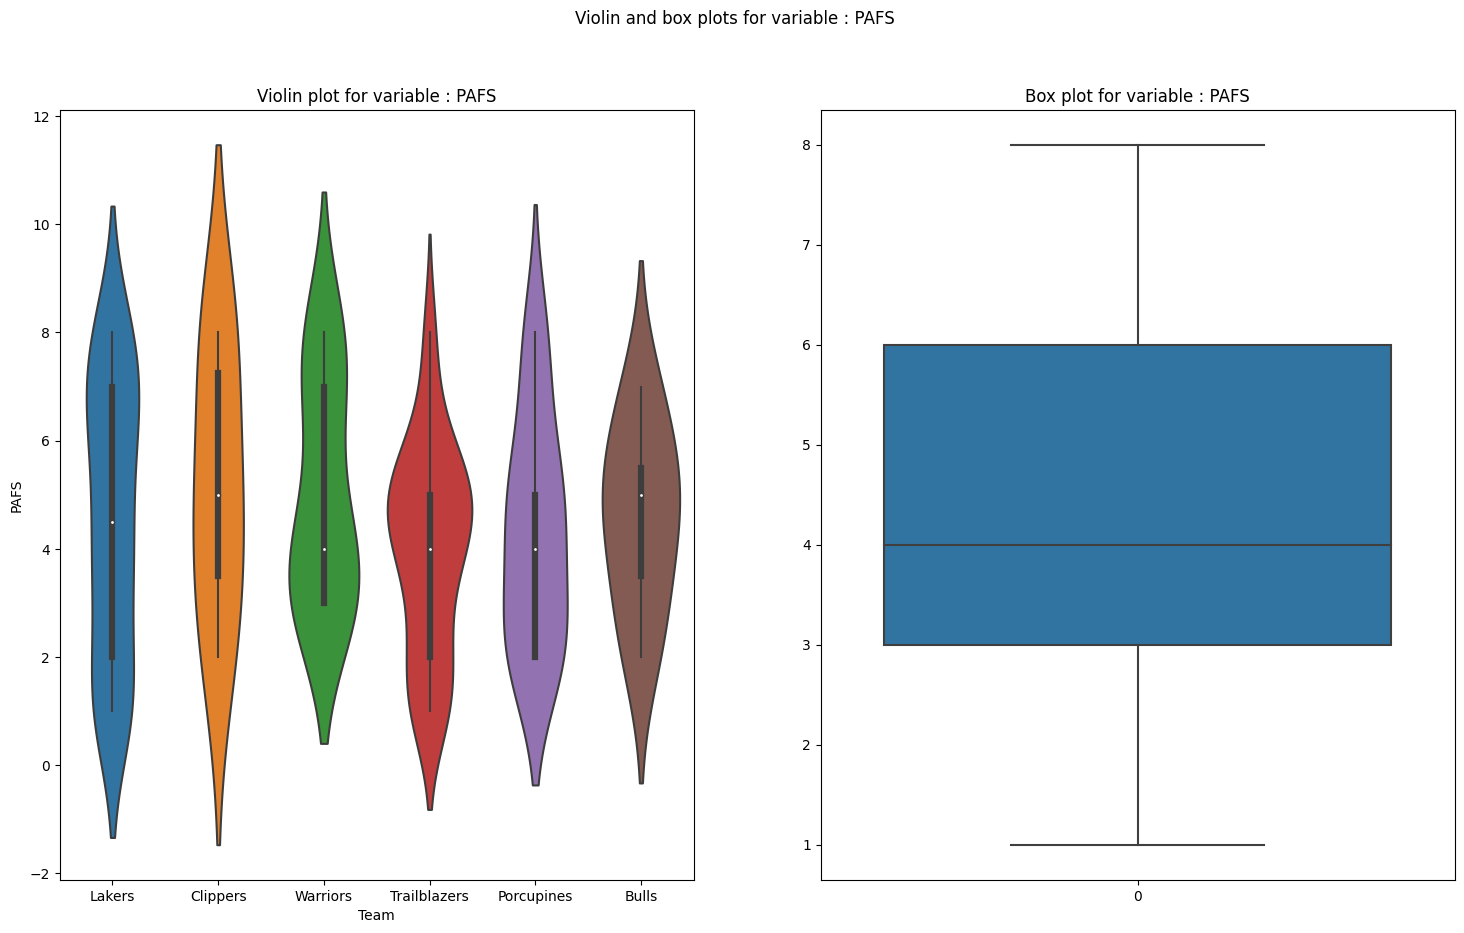

In [ ]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
  plotting_box_violin_plots(df,"Team",x)

In [ ]:
#function for finding out outliers
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][(df[column]>Upper_End)| (df[column]<Lower_End) ]

  return outlier

In [ ]:
for column in ['WL','Yoga','Laps','WI','PAFS']:
  print('\n Outliers in column "%s"' %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "Yoga"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in column "Laps"
144    68.0
Name: Laps, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


In [ ]:
#removing outliers
df_clean=df.drop([142,143,144])

In [ ]:
df_clean.shape

(156, 7)

In [ ]:
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [ ]:
ncounts = pd.DataFrame([df_clean.isna().mean()]).T
ncounts = ncounts.rename(columns={0:'data_missing'})
ncounts

,data_missing
Team,0.000000
Points,0.000000
WL,0.064103
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


<Axes: title={'center': '% of missing values across each column'}>

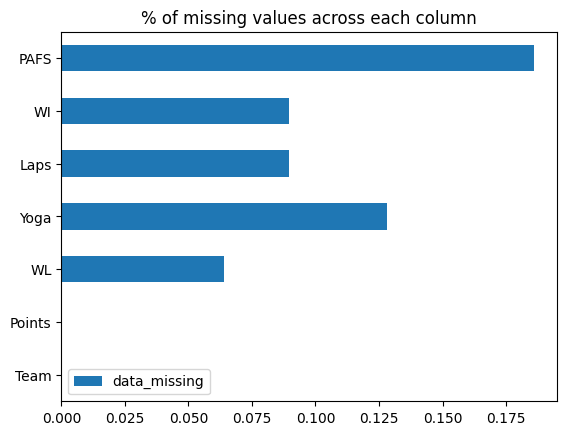

In [ ]:
#plot of missing value in each column
ncounts.plot(kind='barh',title='% of missing values across each column')

# Pandas Imputer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    159 non-null    object 
 1   Points  159 non-null    int64  
 2   WL      150 non-null    float64
 3   Yoga    139 non-null    float64
 4   Laps    145 non-null    float64
 5   WI      145 non-null    float64
 6   PAFS    130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [ ]:
#filling missing values with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for WL')

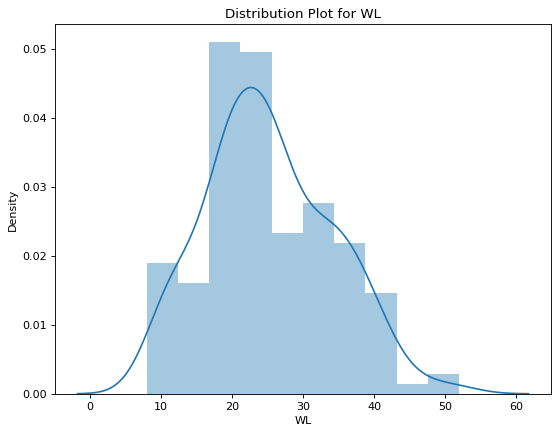

In [ ]:
#visualizing after filling missing value with mean
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

Text(0.5, 1.0, 'Distribution Plot for WL')

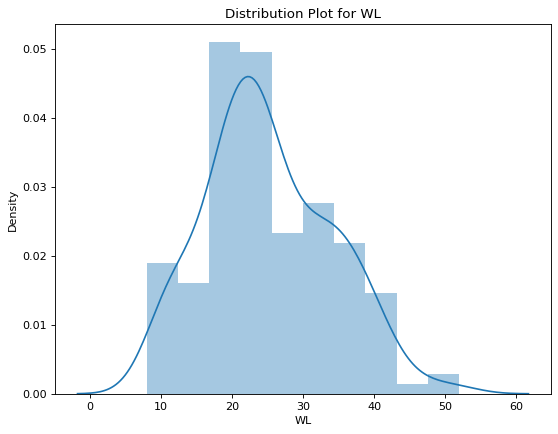

In [ ]:
#visualizing after filling missing value with median
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

In [ ]:
#Groupby team
mean_WL=df_clean.groupby("Team")['WL'].mean().to_dict()
mean_WL


{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [ ]:
for index, row in df_clean.iterrows():
    team = row['Team']
    if pd.isna(row['WL']):
        mean_value = mean_WL.get(team)
        df_clean.at[index, 'WL'] = mean_value

Text(0.5, 1.0, 'Distribution Plot for WL')

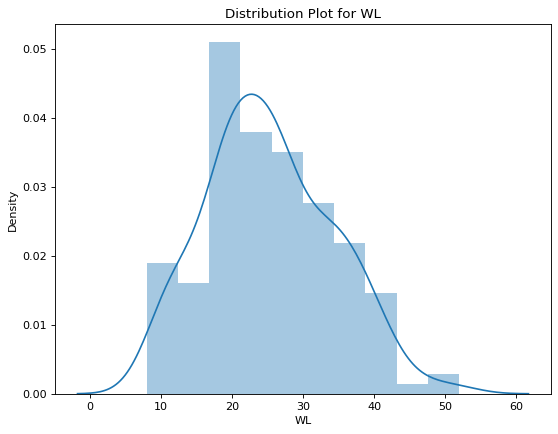

In [ ]:
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].replace(mean_WL))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

In [ ]:
df_clean.groupby('Team')['WL']

In [ ]:
df_clean['WL']=df_clean.groupby('Team')['WL'].transform(lambda x:x.fillna(x.mean()))

In [ ]:
#  1 Simple Imputer

Features=['WL','Yoga','Laps','WI','PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

#Fit & Transform

si_impt=impt.fit_transform(df_clean[Features])
si_impt_df=pd.DataFrame(si_impt,columns=Features)

si_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [ ]:
ITI=IterativeImputer(max_iter=10)

#Fit & Transform

ITI_impt=ITI.fit_transform(df_clean[Features])

ITI_impt_df=pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.462586,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.411891
152,12.0,12.000000,14.0,1.0,4.412035
153,12.0,13.000000,14.0,1.0,4.412172
154,13.0,14.000000,15.0,1.0,6.000000


In [ ]:
# KNN Imputer

from sklearn.impute import KNNImputer

KNN=KNNImputer(n_neighbors=3)

#Fit & Transform

KNN_impt=KNN.fit_transform(df_clean[Features])

KNN_impt_df=pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


In [ ]:
df_new = KNN_impt_df

### **Univariate Analysis**

In [ ]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

<Axes: xlabel='WL', ylabel='Density'>

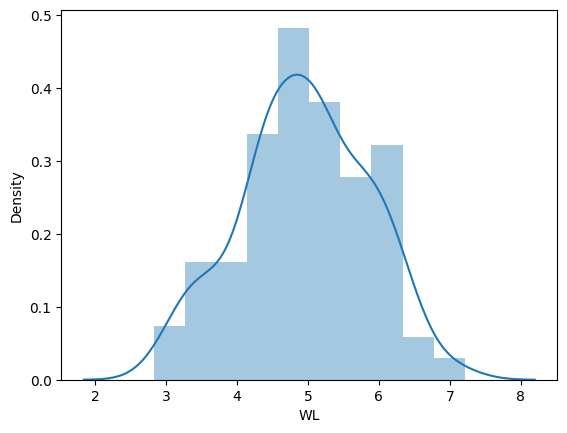

In [ ]:
#distribution plot
sns.distplot(np.sqrt(df_new["WL"]))

<Axes: >

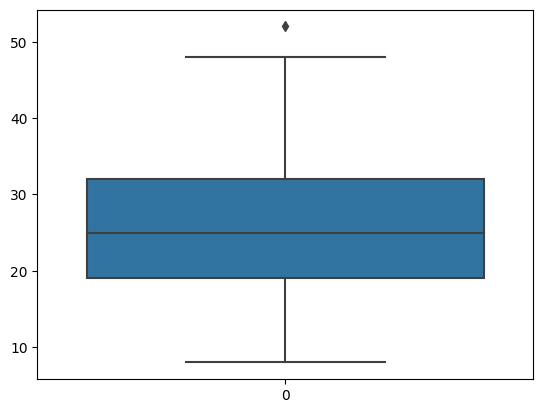

In [ ]:
#boxplot
sns.boxplot(df_new["WL"])

<Axes: >

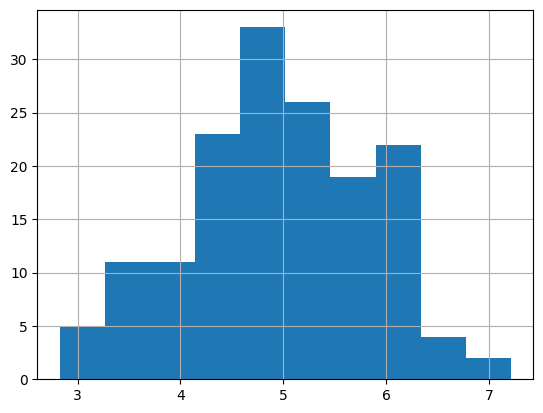

In [ ]:
#histogram plot
np.sqrt(df_new["WL"]).hist()

<Axes: >

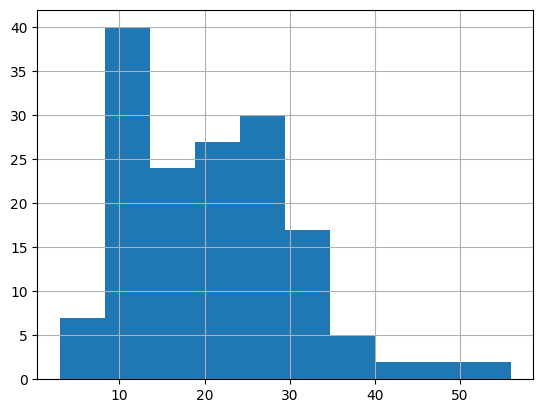

In [ ]:
###Yoga

df_new["Yoga"].hist()

<Axes: xlabel='Yoga', ylabel='Density'>

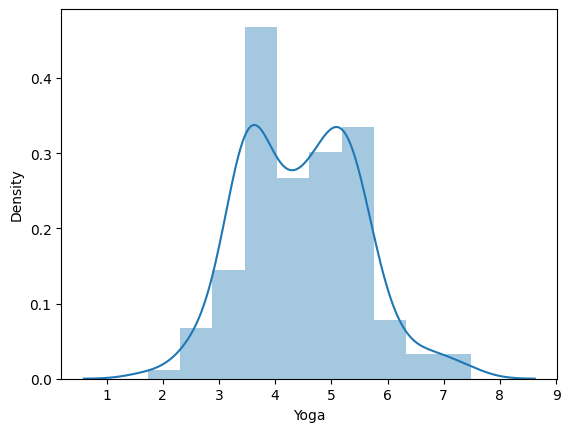

In [ ]:
#distribution plot
sns.distplot(np.sqrt(df_new["Yoga"]))

<Axes: xlabel='PAFS', ylabel='Density'>

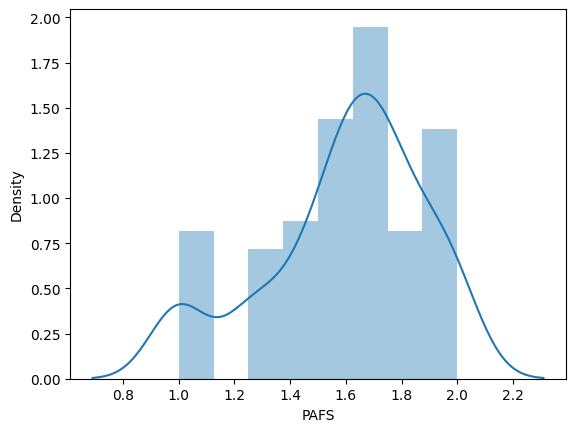

In [ ]:
#distrribution plot
sns.distplot(np.cbrt(df_new["PAFS"]))

### **Bivariate Analysis**


In [ ]:
df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [ ]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [ ]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [ ]:
df_new["Points"]=df_clean['Points']
df_new["Team"]=df_clean['Team']

In [ ]:
#corerelation matrix
df_new.corr()

,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.925674,0.964597,0.686684,-0.006227,0.417535
Yoga,0.925674,1.000000,0.927024,0.615460,0.009638,0.311344
Laps,0.964597,0.927024,1.000000,0.776632,-0.013706,0.440927
WI,0.686684,0.615460,0.776632,1.000000,0.033526,0.403363
PAFS,-0.006227,0.009638,-0.013706,0.033526,1.000000,-0.011601
Points,0.417535,0.311344,0.440927,0.403363,-0.011601,1.000000


Text(0.5, 1.0, 'Linear Correlation Matrix')

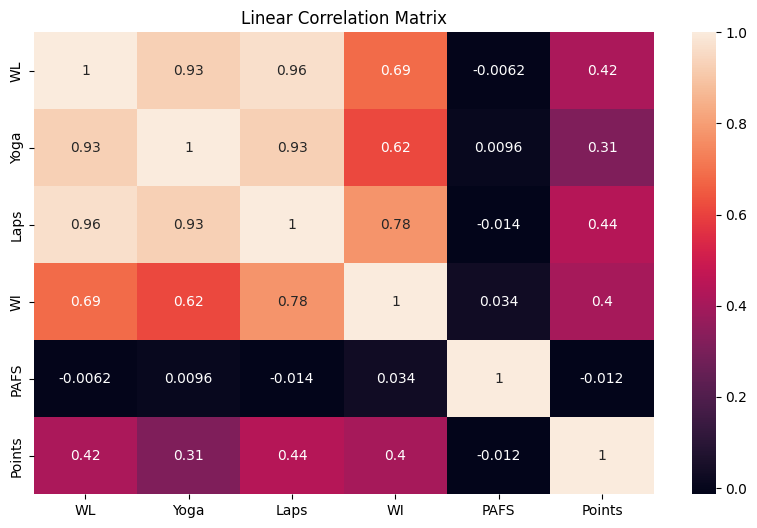

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)

#heatmap of correlation matrix
sns.heatmap(df_new.corr(),annot=True, )

plt.title("Linear Correlation Matrix")

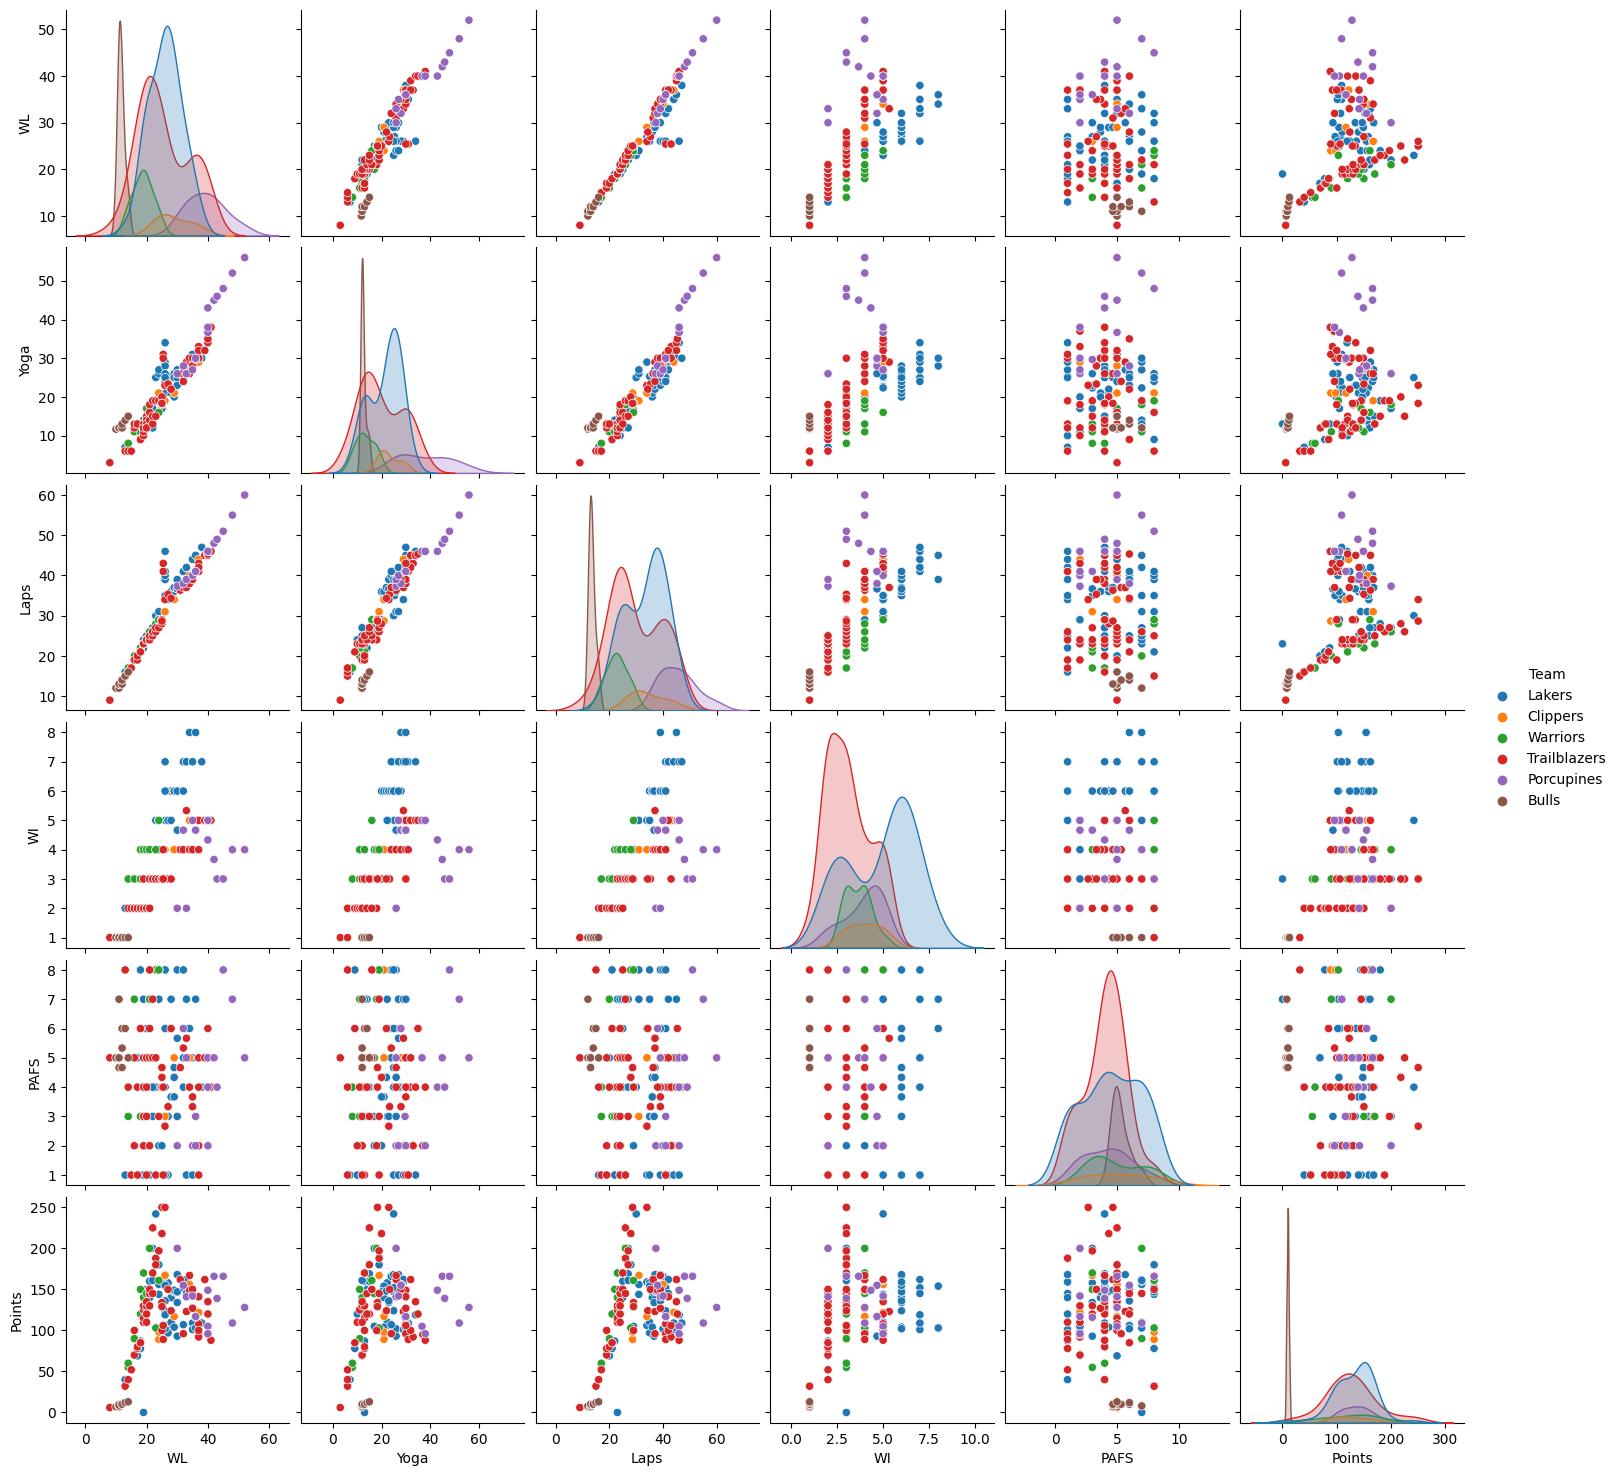

In [ ]:
#pairplot of the data
sns.pairplot(df_new,kind='scatter',hue='Team')

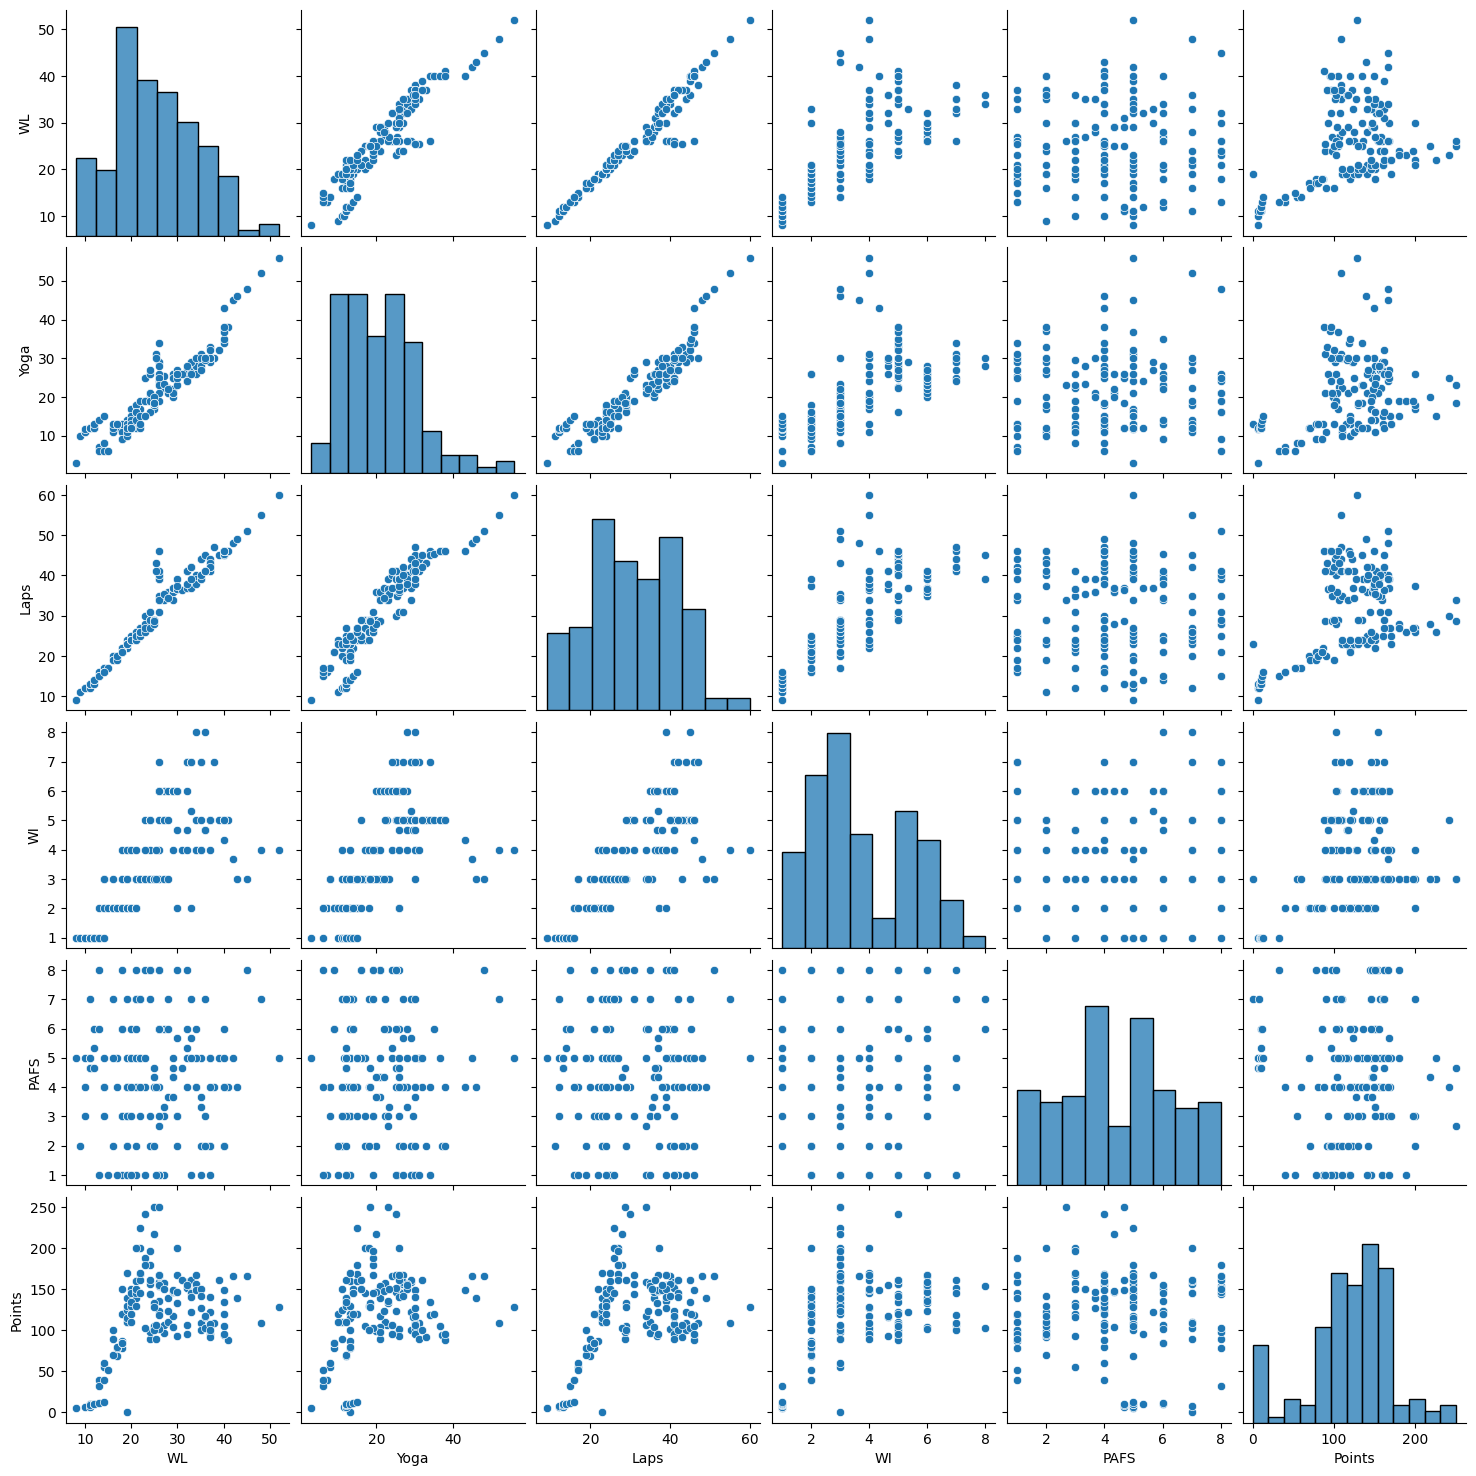

In [ ]:
#scatter pairplot
sns.pairplot(df_new,kind='scatter')

In [ ]:
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
  N=df.shape[0]
  df_rank=df

  df_rank['rank']=df_rank[y].rank()
  #print(df_rank['rank'])

  df_rank['rank_x']=df_rank[x].rank()

  df_rank=df_rank.sort_values(by='rank_x')

  #1-3*(abs(sum(xri-1 - Xir))/n square-1

  #Diff function --> summation -> absolute

  chatt_corr=1- (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)

  return chatt_corr

In [ ]:
chatterjee_corr(df_new,'WL','Points')

0.3954386685843435

In [ ]:
chatterjee_corr(df_new,'WI','Points')

0.328004931169098

In [ ]:
chatterjee_corr(df_new,'Laps','Points')

0.38982946373536054

In [ ]:
chatterjee_corr(df_new,'PAFS','Points')

0.08280254777070062

In [ ]:
chatterjee_corr(df_new,'Yoga','Points')

0.2545305116087939

In [ ]:
import random

nba_id=list(df_new.index.unique())

random.seed(13)
sample_match_id=random.sample(nba_id,50)
sample_df=df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

sample_df=sample_df[['Team','Points']]

groups=sample_df.groupby('Team').count().reset_index()
groups

,Team,Points
0,Bulls,5
1,Clippers,4
2,Lakers,14
3,Porcupines,3
4,Trailblazers,20
5,Warriors,4


In [ ]:
##Normality

import scipy.stats as stats

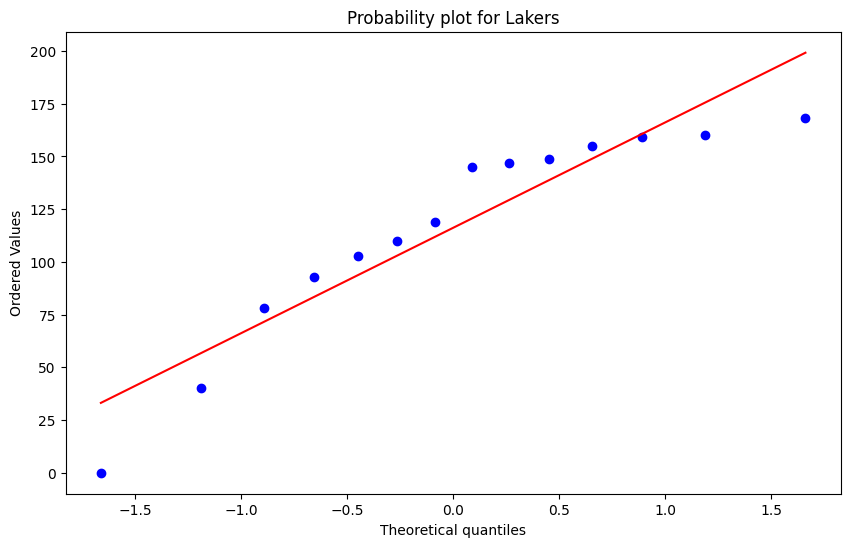

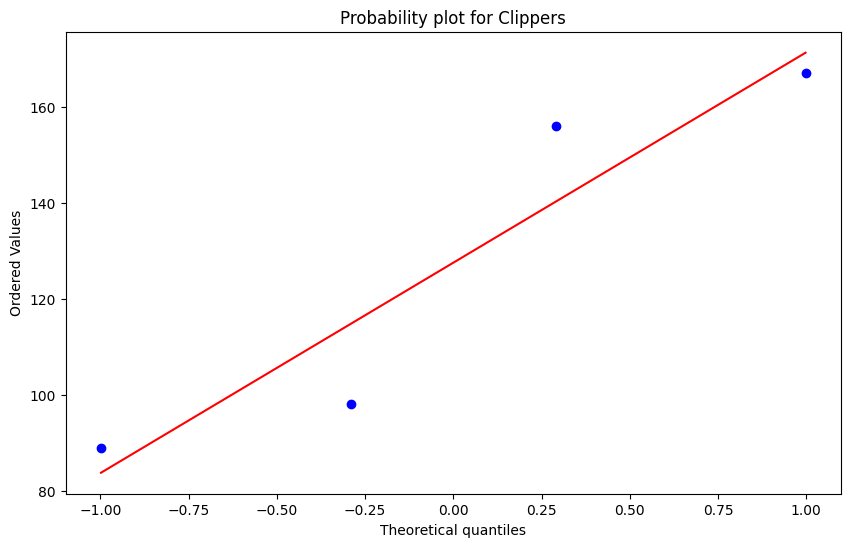

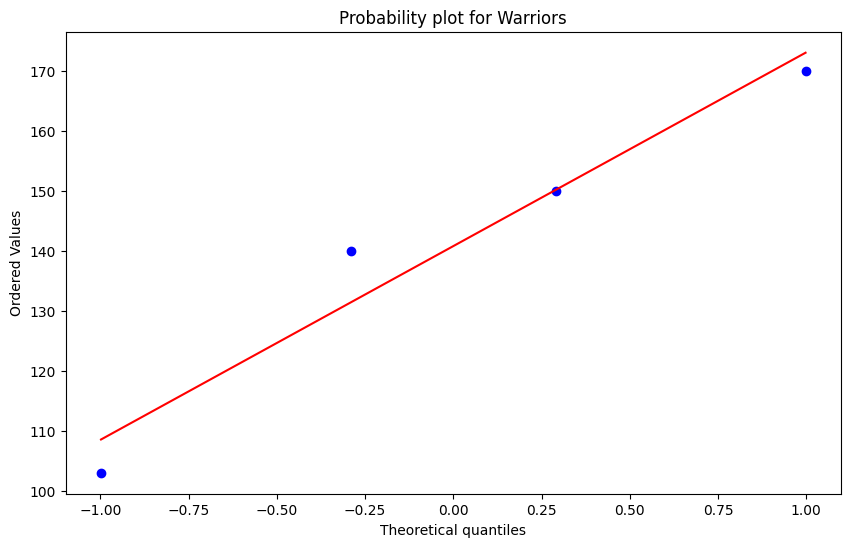

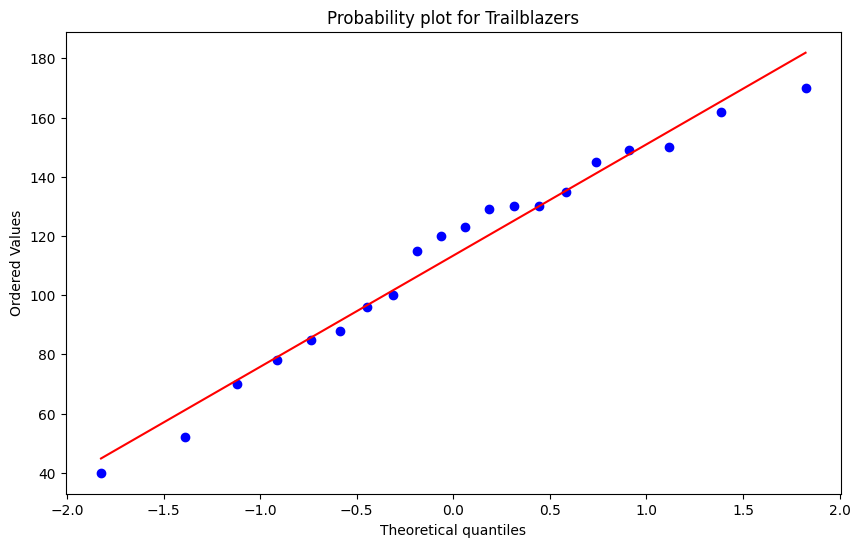

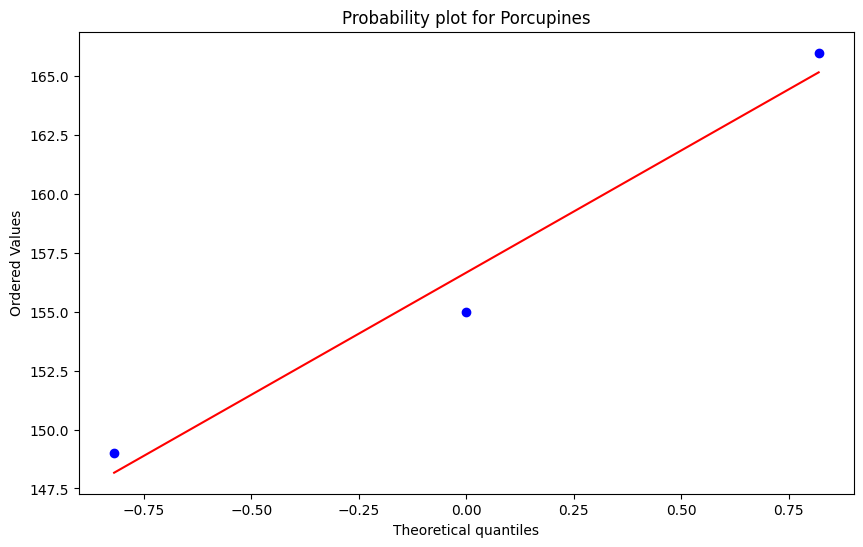

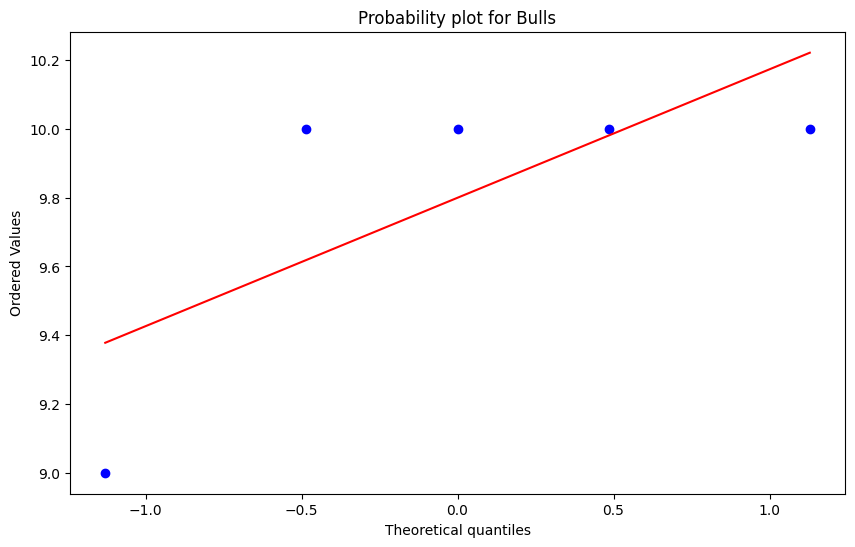

In [ ]:
unique_teams=sample_df['Team'].unique()
#quantile quantile plots
for i in unique_teams:
  stats.probplot(sample_df[sample_df['Team']==i]['Points'],dist='norm',plot=plt)
  plt.title('Probability plot for '+ i)
  plt.show()

In [ ]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    111.492867
dtype: float64

## Processing data for modelling

In [ ]:

#one hot encoding
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [ ]:
one_hot_df.head()

,Points,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,242,23.0,25.0,30.0,5.0,4.0,0,1,0,0,0
1,144,24.0,26.0,31.0,5.0,8.0,0,1,0,0,0
2,156,24.0,27.0,31.0,5.0,7.0,0,1,0,0,0
3,159,26.0,29.0,34.0,5.0,1.0,0,1,0,0,0
4,106,27.0,NaN,34.0,5.0,6.0,0,1,0,0,0


In [ ]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)
